# 基于MFCC以及LSTM深度学习的语音情感识别


### 1. 初步导入所需的库

In [99]:
# 导入库
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import warnings
import seaborn as sns
import glob
import pickle

warnings.filterwarnings("ignore")
# 设置路径
# os.chdir("D:\SpeechEmotionRecognition\dataset")

### 2. 导入数据集


In [100]:
filePath = os.walk(r'D:\SpeechEmotionRecognition\dataset\toronto')
fileList = []
for path,dirs,files in filePath:             # path是文件夹的地址,files是每个文件夹之中的所有文件名称构成的列表
    for file in files:
        fileList.append(os.path.join(path,file))
fileList = fileList[4:]
len(fileList)

2800

In [101]:
label = [file.split('_')[-1].split('.')[0] for file in fileList]
label
len(label)

2800

In [102]:
df = pd.DataFrame({'file':fileList,'label':label})
df

,file,label
0,D:\SpeechEmotionRecognition\dataset\toronto\OA...,angry
1,D:\SpeechEmotionRecognition\dataset\toronto\OA...,angry
2,D:\SpeechEmotionRecognition\dataset\toronto\OA...,angry
3,D:\SpeechEmotionRecognition\dataset\toronto\OA...,angry
4,D:\SpeechEmotionRecognition\dataset\toronto\OA...,angry
...,...,...
2795,D:\SpeechEmotionRecognition\dataset\toronto\YA...,sad
2796,D:\SpeechEmotionRecognition\dataset\toronto\YA...,sad
2797,D:\SpeechEmotionRecognition\dataset\toronto\YA...,sad
2798,D:\SpeechEmotionRecognition\dataset\toronto\YA...,sad


In [103]:
os.chdir(r'D:\SpeechEmotionRecognition\dataset\toronto')

In [104]:
df.info()
df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    2800 non-null   object
 1   label   2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

### 3.提取音频特征


音频处理函数,主要是调用了librosa来实现功能

In [105]:
def wave_plot(data,sr,emotion):
    plt.figure(figsize = (12,4))
    plt.title(emotion)
    librosa.display.waveshow(data,sr = sr)
    plt.show()


def spec_plot(data,sr,emotion):
    plt.figure(figsize = (12,4))
    plt.title(emotion)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)),ref = np.max)
    librosa.display.specshow(D,y_axis = 'log',x_axis = 'time')
    plt.colorbar(format = '%+2.0f dB')
    plt.show()


def mfcc_plot(data,sr,emotion):
    plt.figure(figsize = (10,4))
    plt.title(emotion)
    mfccs = librosa.feature.mfcc(data,sr = sr)
    librosa.display.specshow(mfccs,x_axis = 'time')
    plt.colorbar()
    plt.show()


def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (10,5))
    plt.title(emotion)
    librosa.display.specshow(xdb,sr = sr,x_axis = 'time',y_axis = 'hz')
    plt.colorbar()
    plt.show()

绘制不同情绪状态下的波形图,频谱图,以及MFCC图像


In [106]:
emotion = 'angry'
files = df[df['label'] == emotion]
files = files['file'].tolist()
files

['D:\\SpeechEmotionRecognition\\dataset\\toronto\\OAF_angry\\OAF_back_angry.wav',
 'D:\\SpeechEmotionRecognition\\dataset\\toronto\\OAF_angry\\OAF_bar_angry.wav',
 'D:\\SpeechEmotionRecognition\\dataset\\toronto\\OAF_angry\\OAF_base_angry.wav',
 'D:\\SpeechEmotionRecognition\\dataset\\toronto\\OAF_angry\\OAF_bath_angry.wav',
 'D:\\SpeechEmotionRecognition\\dataset\\toronto\\OAF_angry\\OAF_bean_angry.wav',
 'D:\\SpeechEmotionRecognition\\dataset\\toronto\\OAF_angry\\OAF_beg_angry.wav',
 'D:\\SpeechEmotionRecognition\\dataset\\toronto\\OAF_angry\\OAF_bite_angry.wav',
 'D:\\SpeechEmotionRecognition\\dataset\\toronto\\OAF_angry\\OAF_boat_angry.wav',
 'D:\\SpeechEmotionRecognition\\dataset\\toronto\\OAF_angry\\OAF_bone_angry.wav',
 'D:\\SpeechEmotionRecognition\\dataset\\toronto\\OAF_angry\\OAF_book_angry.wav',
 'D:\\SpeechEmotionRecognition\\dataset\\toronto\\OAF_angry\\OAF_bought_angry.wav',
 'D:\\SpeechEmotionRecognition\\dataset\\toronto\\OAF_angry\\OAF_burn_angry.wav',
 'D:\\SpeechEmot

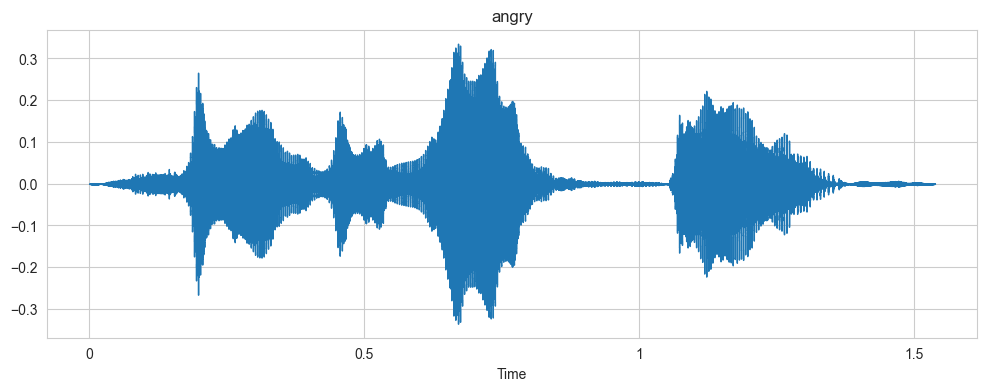

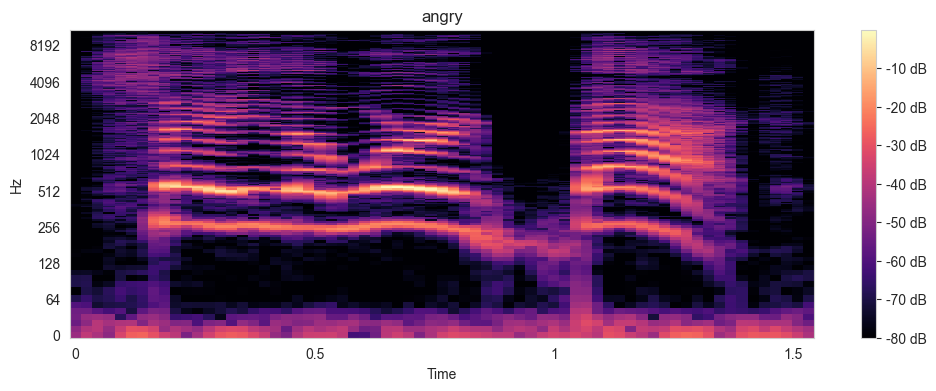

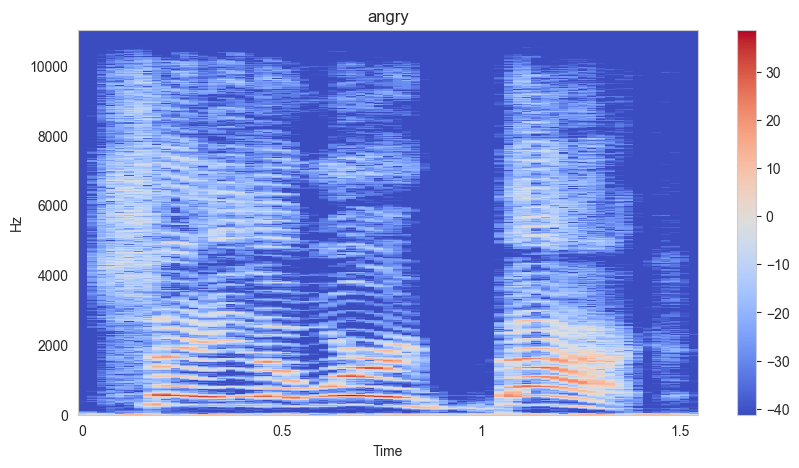

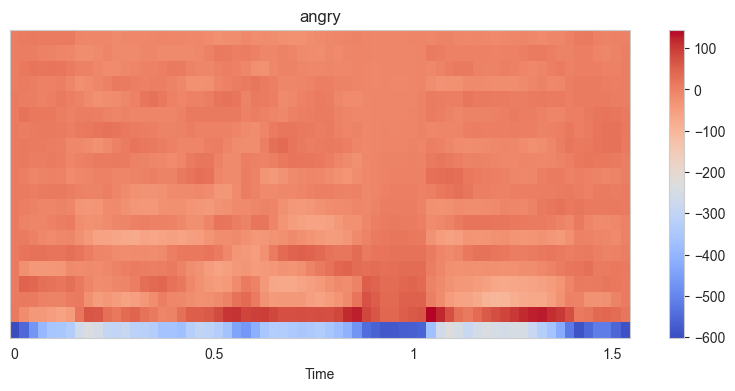

In [107]:
data,sampling_rate = librosa.load(files[0])

wave_plot(data,sampling_rate,emotion)          # wave_plot(data,sampling_rate,emotion),该函数可以输出波形图
spec_plot(data,sampling_rate,emotion)          # spec_plot(data,sampling_rate,emotion),该函数可以输出频谱图
spectogram(data,sampling_rate,emotion)         # spectogram(data,sampling_rate,emotion),该函数可以输出频谱图
mfcc_plot(data,sampling_rate,emotion)          # mfcc_plot(data,sampling_rate,emotion),该函数可以输出MFCC图
ipd.Audio(files[0])

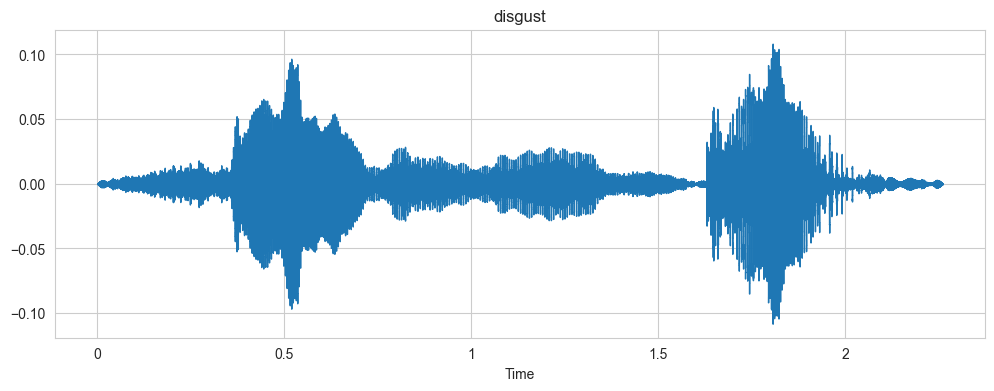

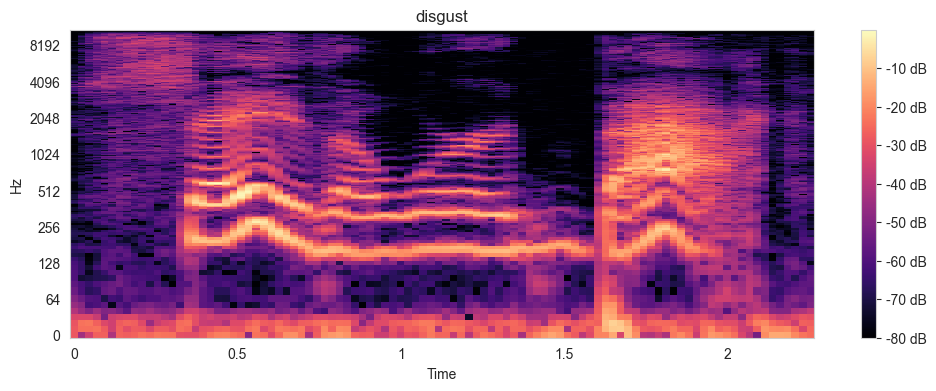

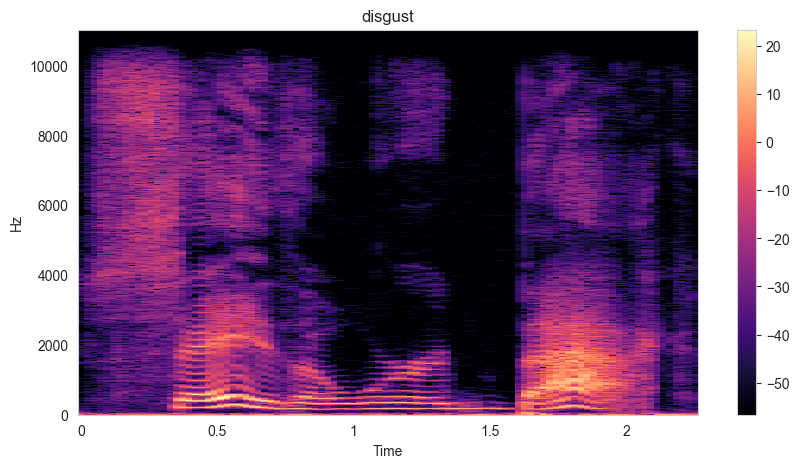

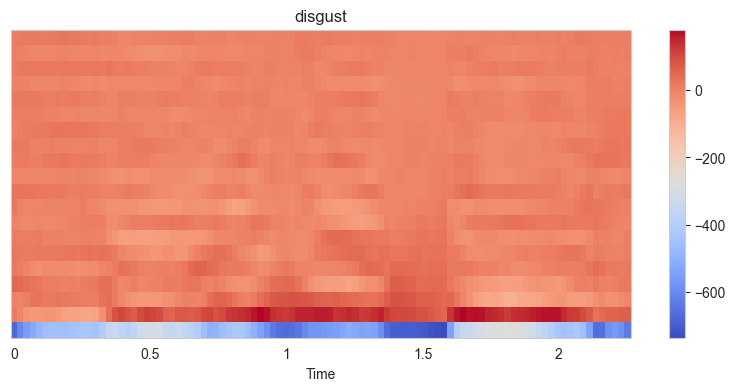

In [108]:
files = df[df['label'] == 'disgust']
data,sampling_rate = librosa.load(files['file'].tolist()[0])
wave_plot(data,sampling_rate,'disgust')
spec_plot(data,sampling_rate,'disgust')
spectogram(data,sampling_rate,'disgust')
mfcc_plot(data,sampling_rate,'disgust')
ipd.Audio(files['file'].tolist()[0])


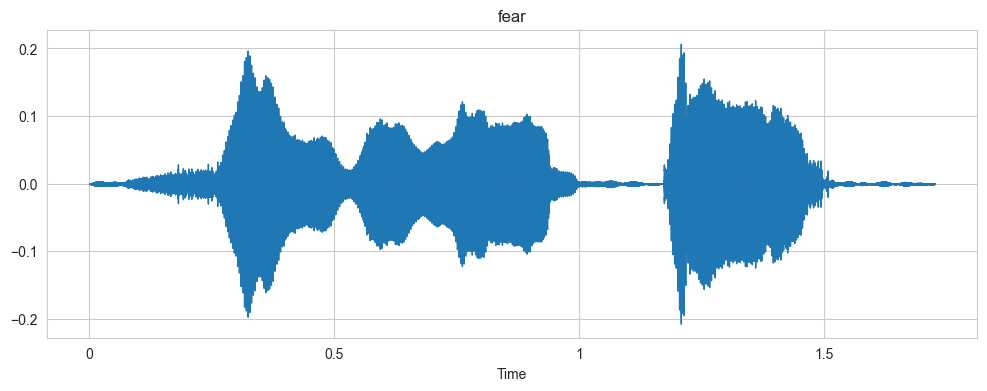

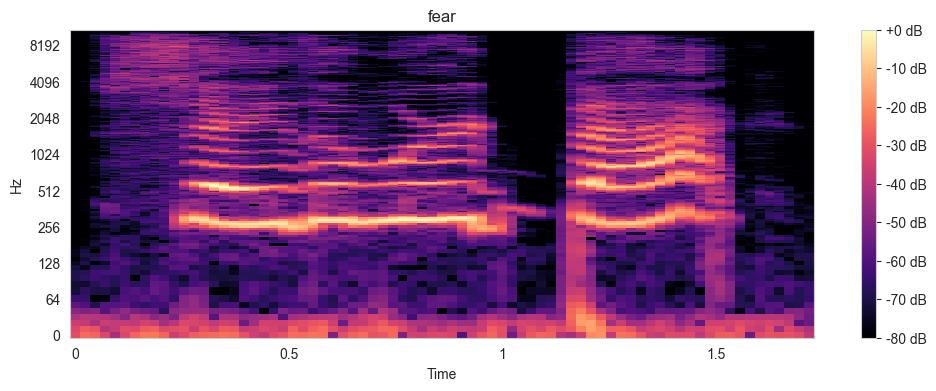

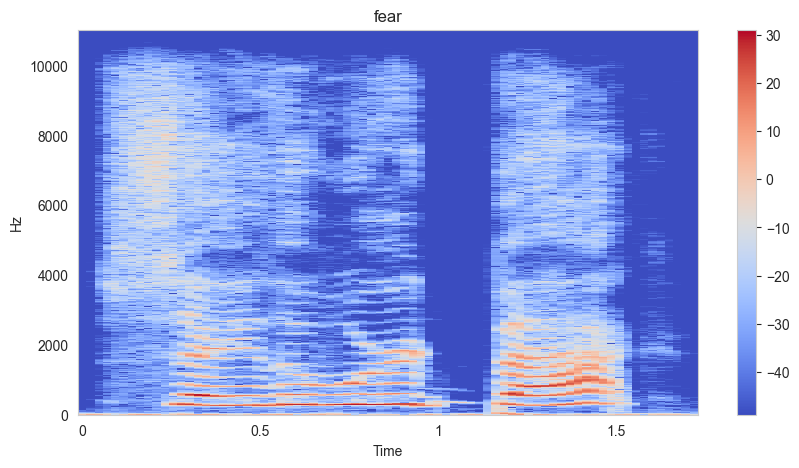

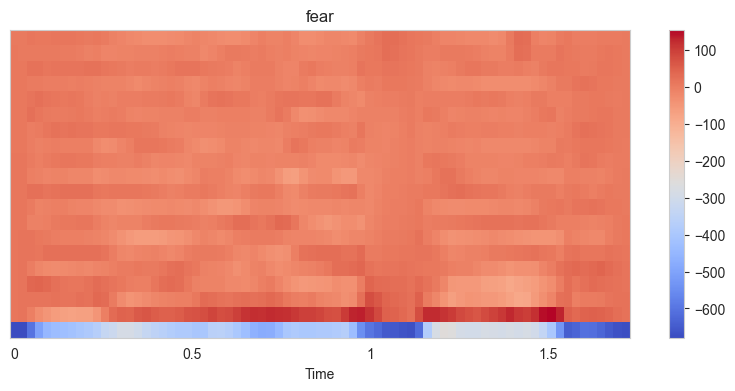

In [109]:
files = df[df['label'] == 'fear']
data,sampling_rate = librosa.load(files['file'].tolist()[0])
wave_plot(data,sampling_rate,'fear')
spec_plot(data,sampling_rate,'fear')
spectogram(data,sampling_rate,'fear')
mfcc_plot(data,sampling_rate,'fear')
ipd.Audio(files['file'].tolist()[0])


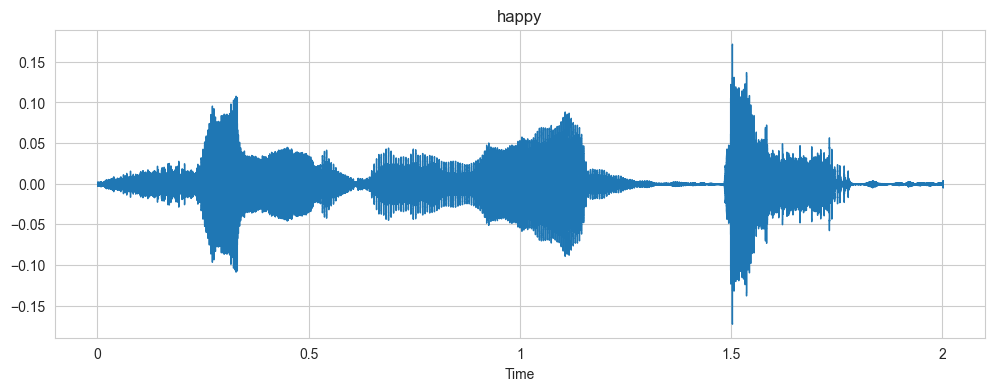

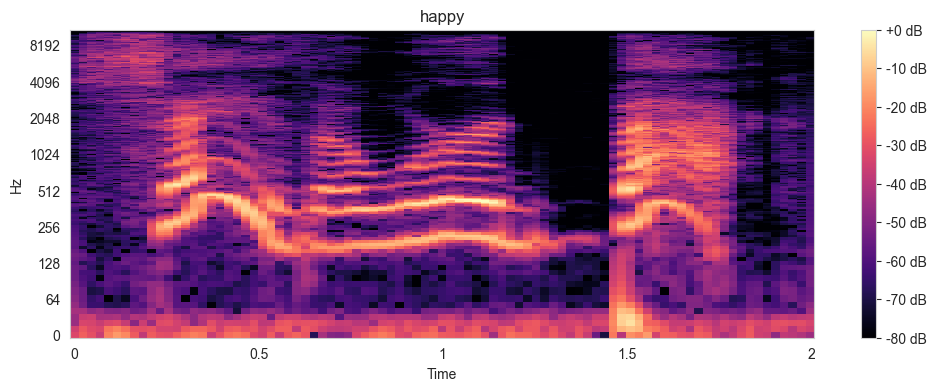

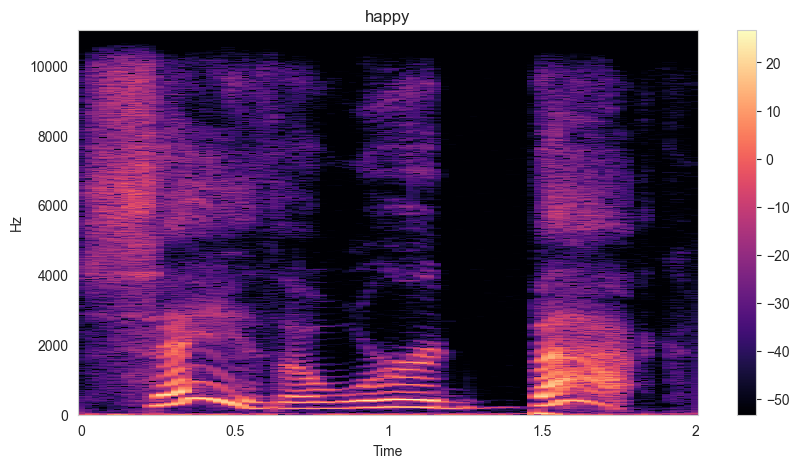

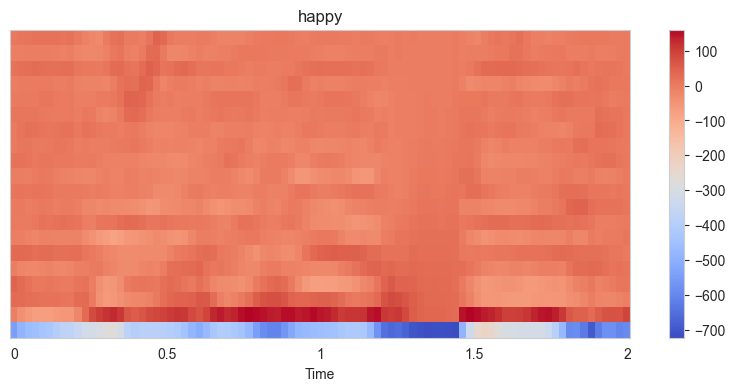

In [110]:
files = df[df['label'] == 'happy']
data,sampling_rate = librosa.load(files['file'].tolist()[0])
wave_plot(data,sampling_rate,'happy')
spec_plot(data,sampling_rate,'happy')
spectogram(data,sampling_rate,'happy')
mfcc_plot(data,sampling_rate,'happy')
ipd.Audio(files['file'].tolist()[0])

#### 抽象出样本特征

In [111]:
def extract_mfcc(filename):    # 提取MFCC特征
    data,sampling_rate = librosa.load(filename,duration=3,offset=0.5)
    mfccs = librosa.feature.mfcc(data,sr = sampling_rate,n_mfcc = 40)
    mfccsscaled = np.mean(mfccs.T,axis = 0)
    return mfccsscaled

In [112]:
sequence = extract_mfcc(files['file'].tolist()[0])
len(sequence)

40

In [113]:
# Xmfcc = [file for file in df['file'].tolist() if file.split('.')[-1]=='wav']
Xmfcc = [extract_mfcc(file) for file in df['file'].tolist()]
# df['file']

In [114]:
len(Xmfcc)

2800

In [115]:
# input split
X = np.expand_dims(Xmfcc,axis = -1)
X.shape

(2800, 40, 1)

In [116]:
X

array([[[-397.91476  ],
        [  78.756226 ],
        [ -20.911753 ],
        ...,
        [   9.09775  ],
        [   2.3394349],
        [  -2.1917243]],

       [[-466.53455  ],
        [  99.911064 ],
        [  -0.480273 ],
        ...,
        [   8.542202 ],
        [   4.3420463],
        [   3.0633633]],

       [[-431.5178   ],
        [  48.56504  ],
        [  -0.8924488],
        ...,
        [   8.395176 ],
        [  -2.108144 ],
        [  -2.7317061]],

       ...,

       [[-380.35938  ],
        [  83.53616  ],
        [  32.67897  ],
        ...,
        [   6.427894 ],
        [   4.6525974],
        [   6.868536 ]],

       [[-436.16336  ],
        [  91.74894  ],
        [  26.539776 ],
        ...,
        [  10.180566 ],
        [  12.204889 ],
        [   9.674301 ]],

       [[-423.6657   ],
        [  73.28961  ],
        [  29.890432 ],
        ...,
        [   4.959351 ],
        [   5.3253727],
        [   6.098741 ]]], dtype=float32)

`to_categorical()`方法:Converts a class vector (integers) to binary class matrix

In [117]:
# from keras.utils import to_categorical               # 此处似乎也可以使用sklearn.preprocessing.LabelEncoder()进行编码,或者是oneHot编码
# y = to_categorical(df['label'])
# y.shape
df['label'].values

array(['angry', 'angry', 'angry', ..., 'sad', 'sad', 'sad'], dtype=object)

In [122]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df['label'].values.reshape(-1,1))
y.shape
y

<2800x7 sparse matrix of type '<class 'numpy.float64'>'
	with 2800 stored elements in Compressed Sparse Row format>

In [123]:
y.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### 创建LSTM模型

In [124]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model = Sequential([
    LSTM(123,input_shape = (40,1),return_sequences = False),
    Dense(64,activation = 'relu'),
    Dropout(0.2),
    Dense(32,activation = 'relu'),
    Dropout(0.2),
    Dense(7,activation = 'softmax')
    ])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 123)               61500     
                                                                 
 dense_9 (Dense)             (None, 64)                7936      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-trai

In [125]:
history  = model.fit(X,y.toarray(),validation_split = 0.2,epochs = 100,batch_size = 256,shuffle=True)

Epoch 1/100
9/9 [==============================] - 19s 714ms/step - loss: 1.8430 - accuracy: 0.2371 - val_loss: 1.7918 - val_accuracy: 0.3411
Epoch 2/100
9/9 [==============================] - 1s 122ms/step - loss: 1.5679 - accuracy: 0.4362 - val_loss: 1.7170 - val_accuracy: 0.2875
Epoch 3/100
9/9 [==============================] - 1s 121ms/step - loss: 1.1757 - accuracy: 0.5772 - val_loss: 1.6384 - val_accuracy: 0.2911
Epoch 4/100
9/9 [==============================] - 1s 119ms/step - loss: 0.8887 - accuracy: 0.6710 - val_loss: 1.8729 - val_accuracy: 0.2893
Epoch 5/100
9/9 [==============================] - 1s 125ms/step - loss: 0.6811 - accuracy: 0.7482 - val_loss: 2.0105 - val_accuracy: 0.2929
Epoch 6/100
9/9 [==============================] - 1s 120ms/step - loss: 0.5437 - accuracy: 0.8062 - val_loss: 2.4365 - val_accuracy: 0.3036
Epoch 7/100
9/9 [==============================] - 1s 122ms/step - loss: 0.4653 - accuracy: 0.8277 - val_loss: 2.2468 - val_accuracy: 0.3500
Epoch 8/100


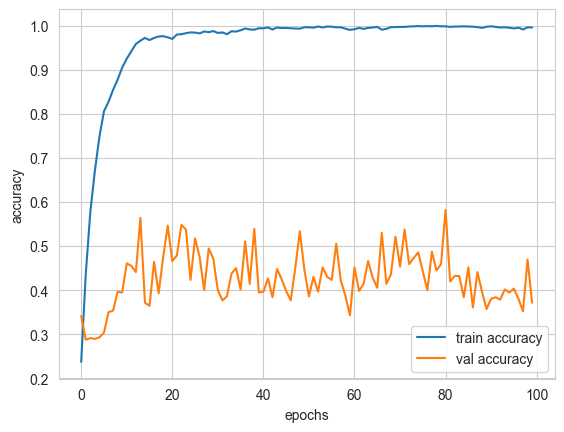

In [126]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

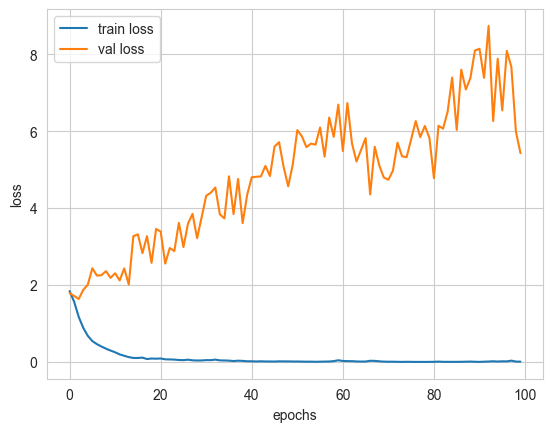

In [127]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [129]:
def getSentiment(address):
    data,sampling_rate = librosa.load(address,duration=3,offset=0.5)
    mfccs = librosa.feature.mfcc(data,sr = sampling_rate,n_mfcc = 40)
    mfccsscaled = np.mean(mfccs.T,axis = 0)
    mfccsscaled = np.expand_dims(mfccsscaled,axis = -1)
    mfccsscaled = np.expand_dims(mfccsscaled,axis = 0)
    prediction = model.predict_on_batch(mfccsscaled)
    return prediction


def getSentimentType(li):
    li = li.tolist()[0]
    print(li)
    emotionList = ['angry','disgust','fear','happy','neutral','sad','ps']
    Credibility = max(li)/sum(li)
    # print(li.index(max(li)))
    type = emotionList[li.index(max(li))]
    print('该条语音的情感类型为:',type,'. 预测置信度为:',Credibility)
    return type,Credibility


import IPython.display as ipd
import random
def test(num):
    # 随机选择num条语音进行测试
    for i in range(num):
        randomNum = random.randrange(2799)
        filePath = df.at[randomNum,'file']
        print("选中的数据是",filePath)
        fileSentiment = df.at[randomNum,'label']
        print('该条语音的情感状态是',fileSentiment)
        ans = getSentiment(filePath)
        # ipd.Audio(filePath)
        type,Credibility = getSentimentType(ans)
        if type == fileSentiment:
            print('预测正确')
        else:
            print('预测错误')

In [130]:
filePath = df.at[1999,'file']
# getSentiment(filePath)
print(filePath)
li = getSentiment(filePath).tolist()[0]
li

D:\SpeechEmotionRecognition\dataset\toronto\YAF_fear\YAF_youth_fear.wav


[2.284946676311961e-09,
 3.101366052860044e-09,
 0.9999998807907104,
 4.057632008169776e-09,
 5.504983491277926e-08,
 1.6616793496737614e-09,
 3.0363143110889723e-09]

In [131]:
test(10)

选中的数据是 D:\SpeechEmotionRecognition\dataset\toronto\OAF_Pleasant_surprise\OAF_cheek_ps.wav
该条语音的情感状态是 ps
[1.2113630987187207e-07, 3.841223588096909e-06, 6.196694712912176e-09, 6.938560090929968e-07, 2.055147206192487e-06, 0.9999849796295166, 8.36731032904936e-06]
该条语音的情感类型为: sad . 预测置信度为: 0.999984915130836
预测错误
选中的数据是 D:\SpeechEmotionRecognition\dataset\toronto\YAF_happy\YAF_lean_happy.wav
该条语音的情感状态是 happy
[9.503256706011598e-07, 6.749394998450953e-08, 1.558499889142695e-07, 0.999993085861206, 4.273342568694716e-09, 5.650948878610507e-06, 1.9775420412315725e-08]
该条语音的情感类型为: happy . 预测置信度为: 0.9999931513323005
预测正确
选中的数据是 D:\SpeechEmotionRecognition\dataset\toronto\OAF_Pleasant_surprise\OAF_vote_ps.wav
该条语音的情感状态是 ps
[2.986461211662572e-08, 1.3675495438292273e-06, 3.049652086417609e-09, 1.8489836293156259e-06, 1.1986162462562788e-07, 0.9999922513961792, 4.361367700767005e-06]
该条语音的情感类型为: sad . 预测置信度为: 0.9999922693230987
预测错误
选中的数据是 D:\SpeechEmotionRecognition\dataset\toronto\OAF_Sad\OAF_su